# Homework 2

Please put the statement of the problem here. You can copy / paste or summarize however you like.

## Discussion of results

Once you are done with the homework, please add a section at the top where you say what you actually found.

## Setup

This section is for imports and such

In [1]:
%matplotlib inline
import arviz as az
import matplotlib.pyplot as plt
import pymc as pm
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from google.colab import files

!pip install preliz
import preliz as pz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.1/519.1 kB 6.2 MB/s eta 0:00:00


In [2]:
az.style.use("arviz-darkgrid")
sns.set_style("darkgrid")

## 1. Question 1

In [3]:
#create data
trials = 4
theta_real = 0.35 # unknown value in a real experiment
data = pz.Binomial(n=1, p=theta_real).rvs(trials)
data

array([0, 0, 0, 1])

In [4]:
#creating our three models
coords = {"data": np.arange(len(data))}

with pm.Model(coords=coords) as model_1:
    thet = pm.Beta('thet', alpha=1., beta=1.)
    y = pm.Bernoulli('y', p=thet, observed=data, dims = 'data')
    idata1 = pm.sample(1000, chains = 4)


with pm.Model(coords=coords) as model_2:
    thet = pm.Uniform('thet', lower=0, upper=1)
    y = pm.Bernoulli('y', p=thet, observed=data, dims = 'data')
    idata2 = pm.sample(1000, chains = 4)


with pm.Model(coords=coords) as model_3:
    thet = pm.Uniform('thet', lower=-1, upper=2)
    y = pm.Bernoulli('y', p=thet, observed=data, dims = 'data')
    idata3 = pm.sample(1000, chains = 4)

Output()

Output()

Output()

ERROR:pymc.stats.convergence:There were 493 divergences after tuning. Increase `target_accept` or reparameterize.


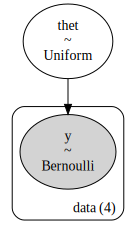

In [8]:
#b. creating the model graphics using model_to_graphviz
pm.model_to_graphviz(model_1)
pm.model_to_graphviz(model_2)
pm.model_to_graphviz(model_3)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

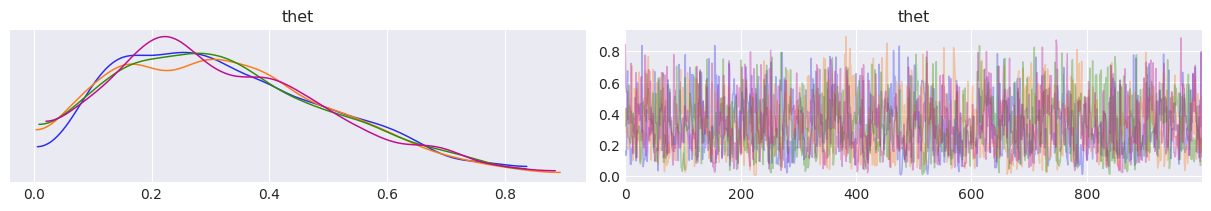

In [18]:
#d. trace plots
az.plot_trace(idata1, compact = False)

plt.savefig("trace1.png", bbox_inches='tight')
files.download("trace1.png")

az.plot_trace(idata2, compact = False)

plt.savefig("trace2.png", bbox_inches='tight')
files.download("trace2.png")

az.plot_trace(idata3, compact = False)
plt.savefig("trace3.png", bbox_inches='tight')
files.download("trace3.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

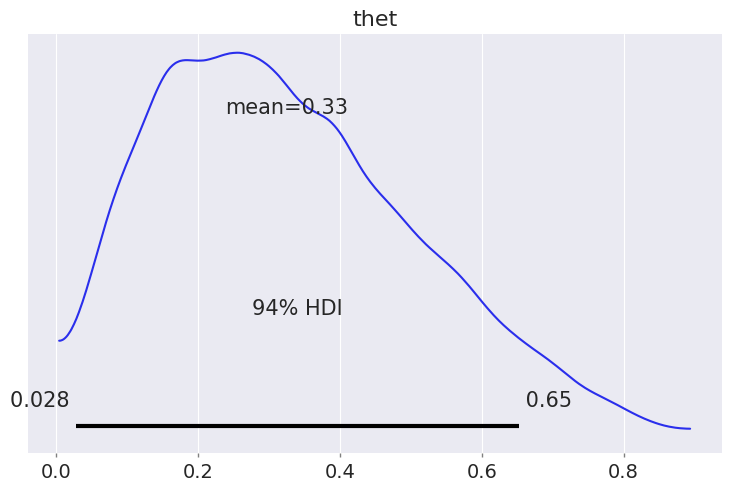

In [19]:
#d. HDI
az.plot_posterior(idata1)

plt.savefig("hdi1.png", bbox_inches='tight')
files.download("hdi1.png")

az.plot_posterior(idata2)

plt.savefig("hdi2.png", bbox_inches='tight')
files.download("hdi2.png")


az.plot_posterior(idata3)

plt.savefig("hdi3.png", bbox_inches='tight')
files.download("hdi3.png")

## 2. Question 2

In [20]:
#loading data
data = np.loadtxt("https://github.com/aloctavodia/BAP3/raw/refs/heads/main/code/data/chemical_shifts.csv")
data

array([51.06, 55.12, 53.73, 50.24, 52.05, 56.4 , 48.45, 52.34, 55.65,
       51.49, 51.86, 63.43, 53.  , 56.09, 51.93, 52.31, 52.33, 57.48,
       57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 51.36, 55.47, 50.73,
       51.94, 54.95, 50.39, 52.91, 51.5 , 52.68, 47.72, 49.73, 51.82,
       54.99, 52.84, 53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42,
       54.3 , 53.84, 53.16])

In [21]:
#c. setting up priors
mu_prior = np.mean(data)
s = np.std(data, ddof = 1)

sig_prior1 = s
sig_prior2 = 3*s
sig_prior3 = 10*s

In [22]:
#model
coords = {"data": np.arange(len(data))}

with pm.Model(coords=coords) as model_1:
  m = pm.Normal('m', mu = mu_prior, sigma = sig_prior1)
  sig = pm.HalfNormal('sig', sigma = 5)
  Y = pm.Normal('Y', mu=m, sigma=sig, observed=data, dims = 'data')
  idata_1 = pm.sample(1000, chains = 4)


with pm.Model(coords=coords) as model_2:
  m = pm.Normal('m', mu = mu_prior, sigma = sig_prior2)
  sig = pm.HalfNormal('sig', sigma = 5)
  Y = pm.Normal('Y', mu=m, sigma=sig, observed=data, dims = 'data')
  idata_2 = pm.sample(1000, chains = 4)


with pm.Model(coords=coords) as model_3:
  m = pm.Normal('m', mu = mu_prior, sigma = sig_prior3)
  sig = pm.HalfNormal('sig', sigma = 5)
  Y = pm.Normal('Y', mu=m, sigma=sig, observed=data, dims = 'data')
  idata_3 = pm.sample(1000, chains = 4)

Output()

Output()

Output()

<ipython-input-23-7ef2555eae8e>:3: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.6)  # Increase spacing between subplots


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-23-7ef2555eae8e>:9: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.6)  # Increase spacing between subplots


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-23-7ef2555eae8e>:15: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.6)  # Increase spacing between subplots


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

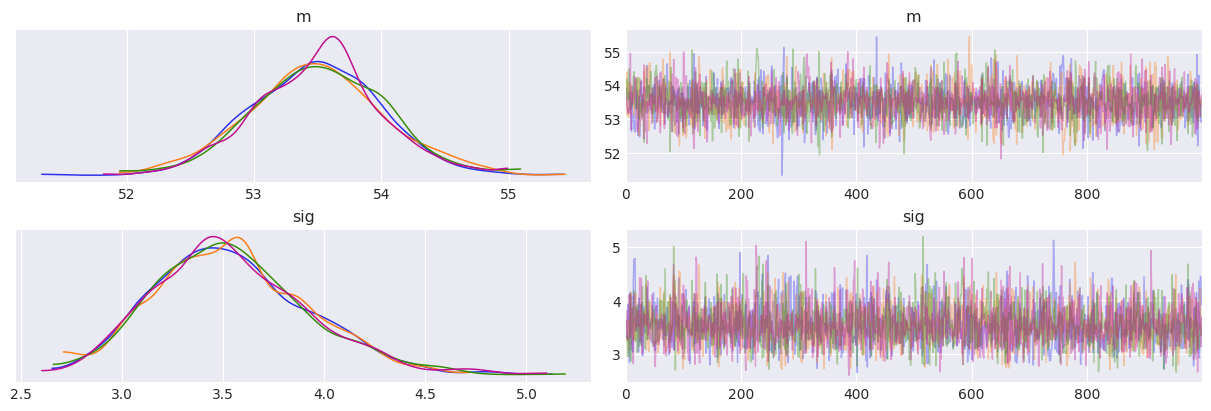

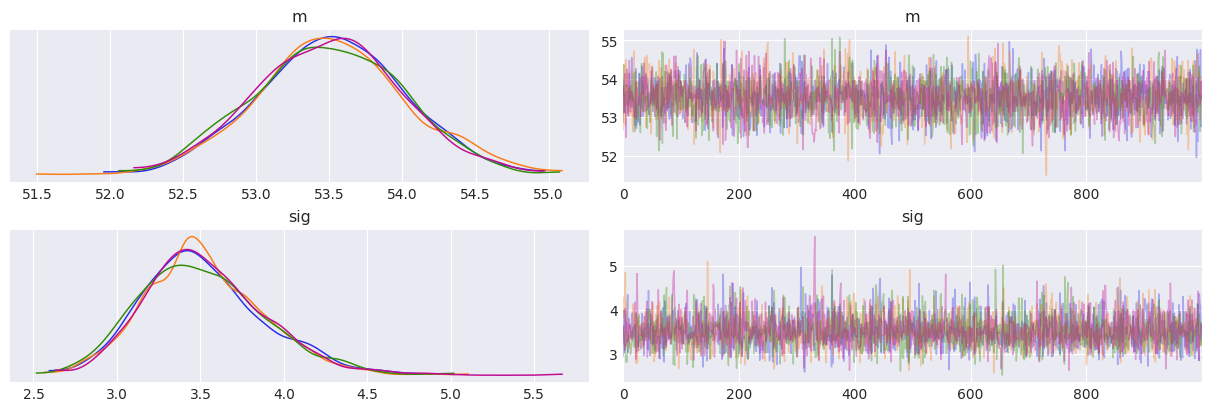

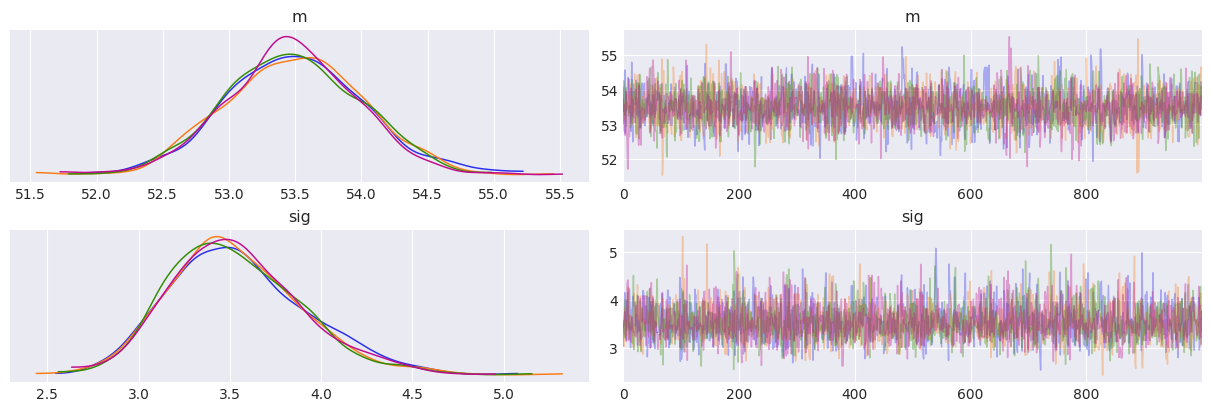

In [23]:
#trace plots
az.plot_trace(idata_1, compact = False)
plt.subplots_adjust(hspace=0.6)  # Increase spacing between subplots

plt.savefig("trace1.png", bbox_inches='tight')
files.download("trace1.png")

az.plot_trace(idata_2, compact = False)
plt.subplots_adjust(hspace=0.6)  # Increase spacing between subplots

plt.savefig("trace2.png", bbox_inches='tight')
files.download("trace2.png")

az.plot_trace(idata_3, compact = False)
plt.subplots_adjust(hspace=0.6)  # Increase spacing between subplots

plt.savefig("trace3.png", bbox_inches='tight')
files.download("trace3.png")

array([<Axes: title={'center': 'm'}>, <Axes: title={'center': 'sig'}>],
      dtype=object)

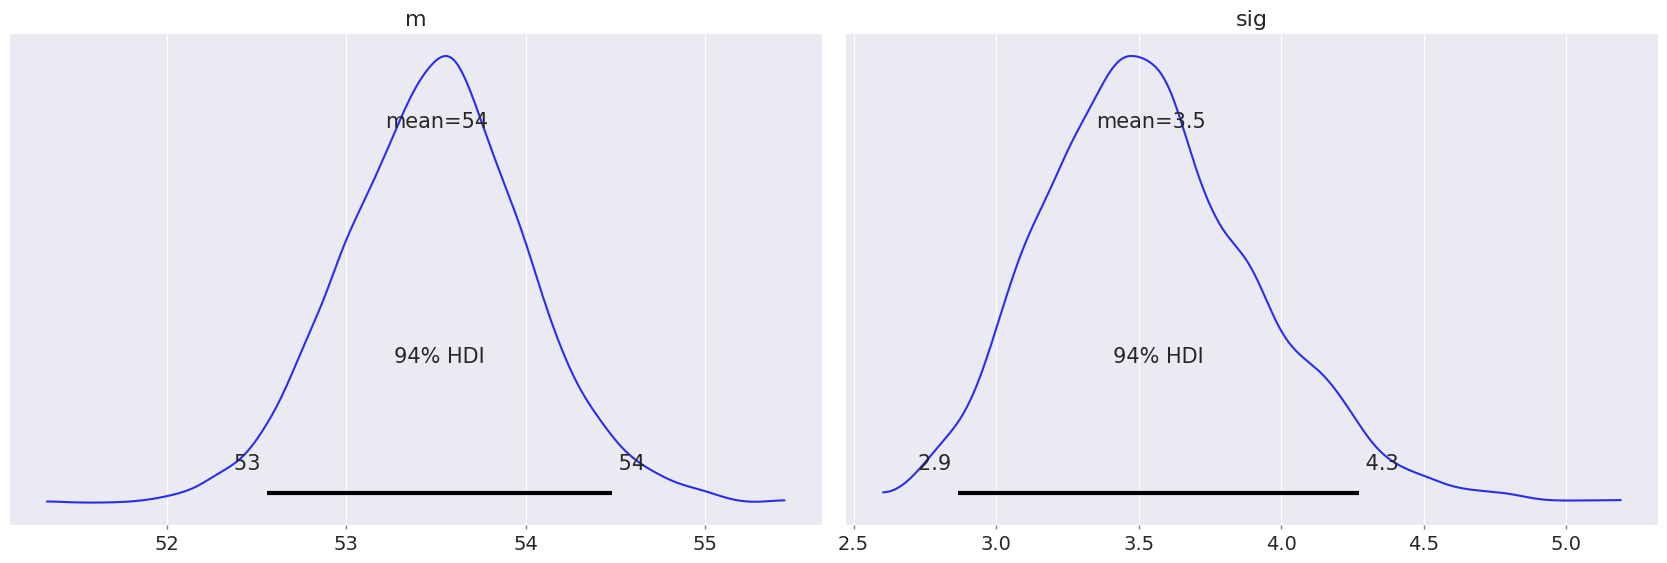

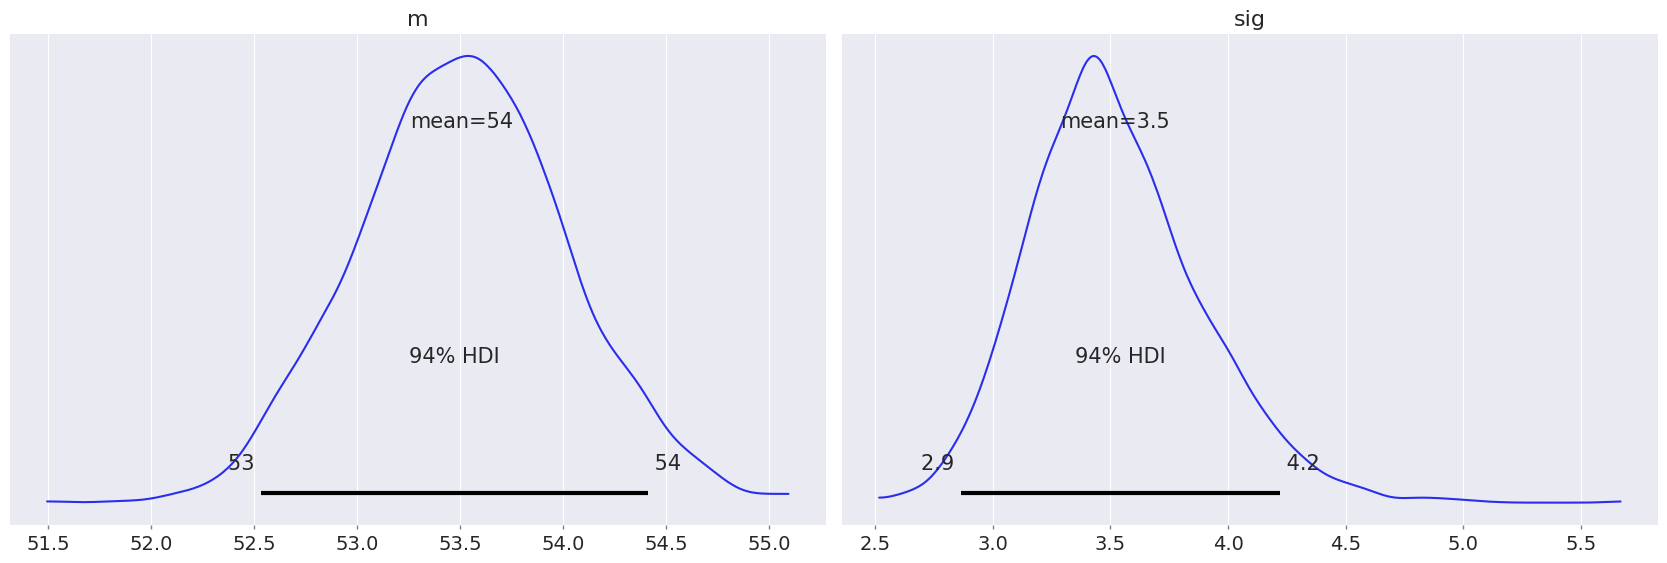

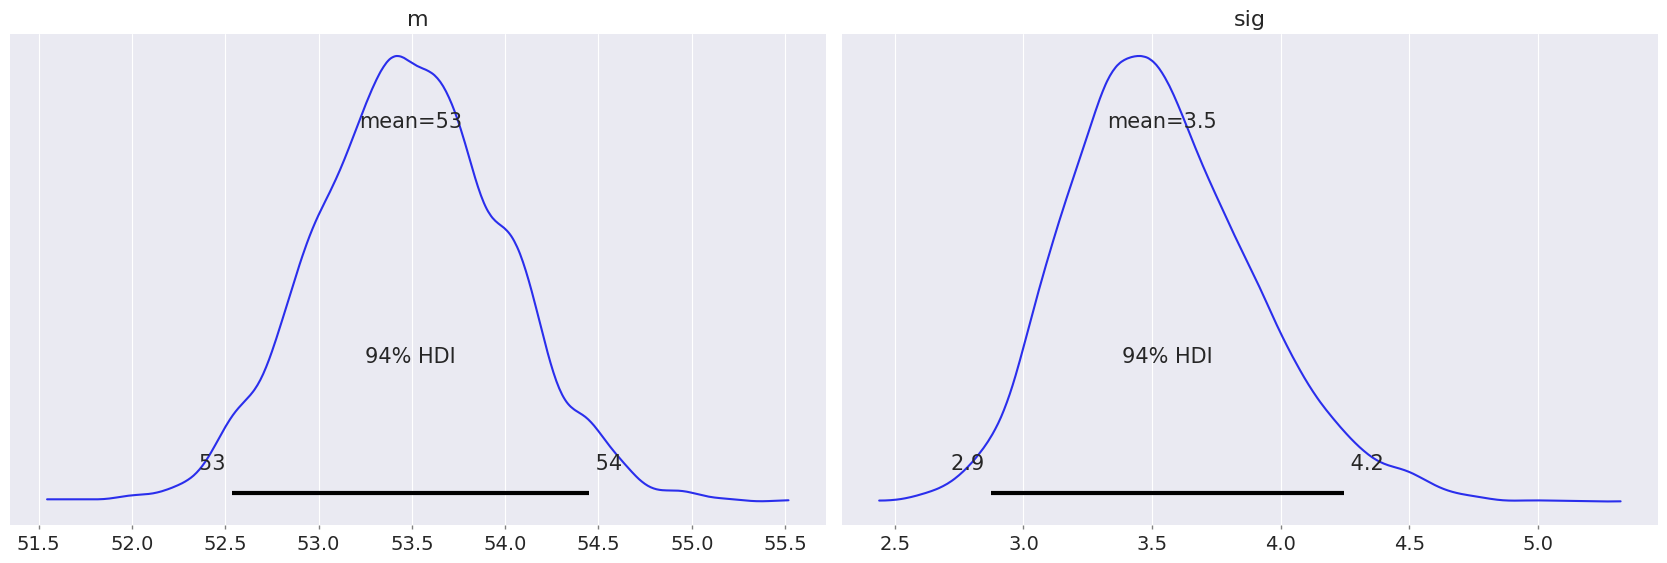

In [24]:
#hdi
az.plot_posterior(idata_1)

az.plot_posterior(idata_2)

az.plot_posterior(idata_3)



Output()

Output()

Output()

<Axes: xlabel='Y'>

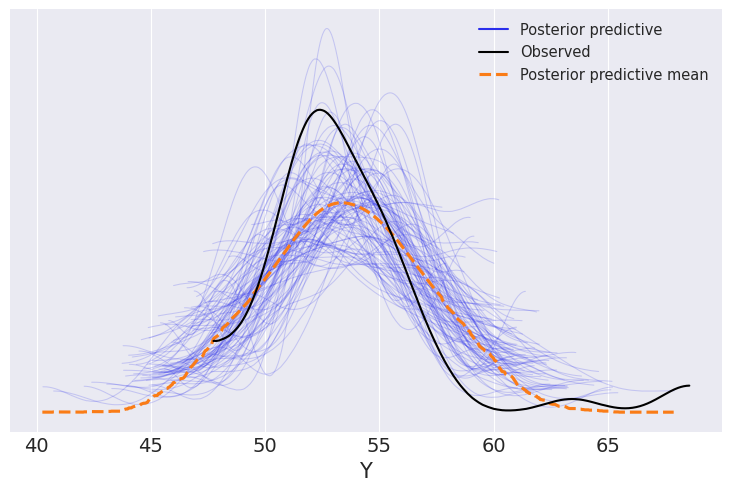

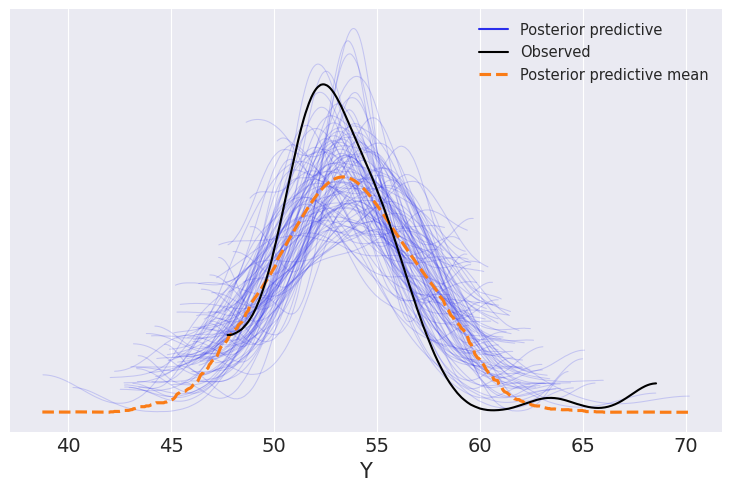

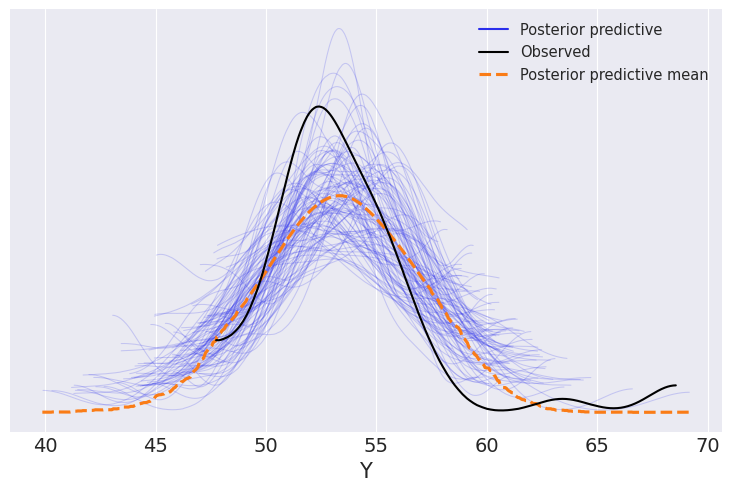

In [25]:
#posterior predictive checks
pm.sample_posterior_predictive(idata_1, model=model_1, extend_inferencedata=True)
pm.sample_posterior_predictive(idata_2, model=model_2, extend_inferencedata=True)
pm.sample_posterior_predictive(idata_3, model=model_3, extend_inferencedata=True)


az.plot_ppc(idata_1, num_pp_samples=100)
az.plot_ppc(idata_2, num_pp_samples=100)
az.plot_ppc(idata_3, num_pp_samples=100)


## 3. Question 3

In [26]:
#model
with pm.Model(coords=coords) as model_t:
  m = pm.Normal('m', mu = mu_prior, sigma = sig_prior2)
  sig = pm.HalfNormal('sig', sigma = 5)
  n = pm.Exponential('n', 1/10)
  Y = pm.StudentT('Y', nu = n, mu=m, sigma=sig, observed=data, dims = 'data')
  idata_t = pm.sample(1000, chains = 4)

Output()

<ipython-input-27-8c89ba50955a>:3: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.6)  # Increase spacing between subplots


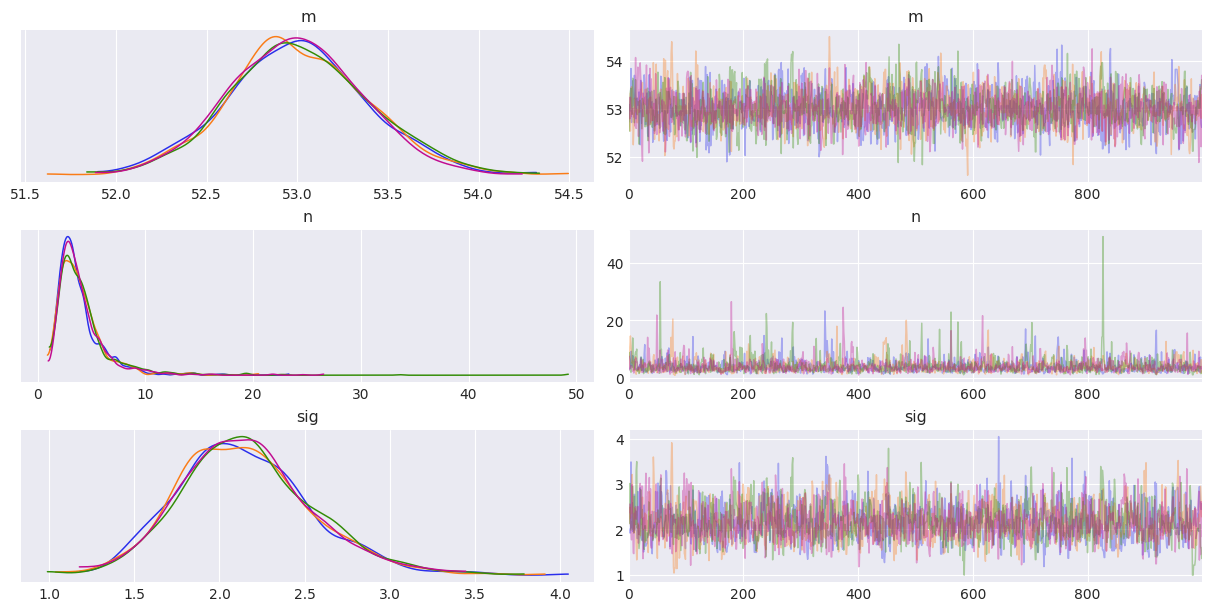

In [27]:
#trace data
az.plot_trace(idata_t, compact = False)
plt.subplots_adjust(hspace=0.6)  # Increase spacing between subplots


array([<Axes: title={'center': 'm'}>, <Axes: title={'center': 'n'}>,
       <Axes: title={'center': 'sig'}>], dtype=object)

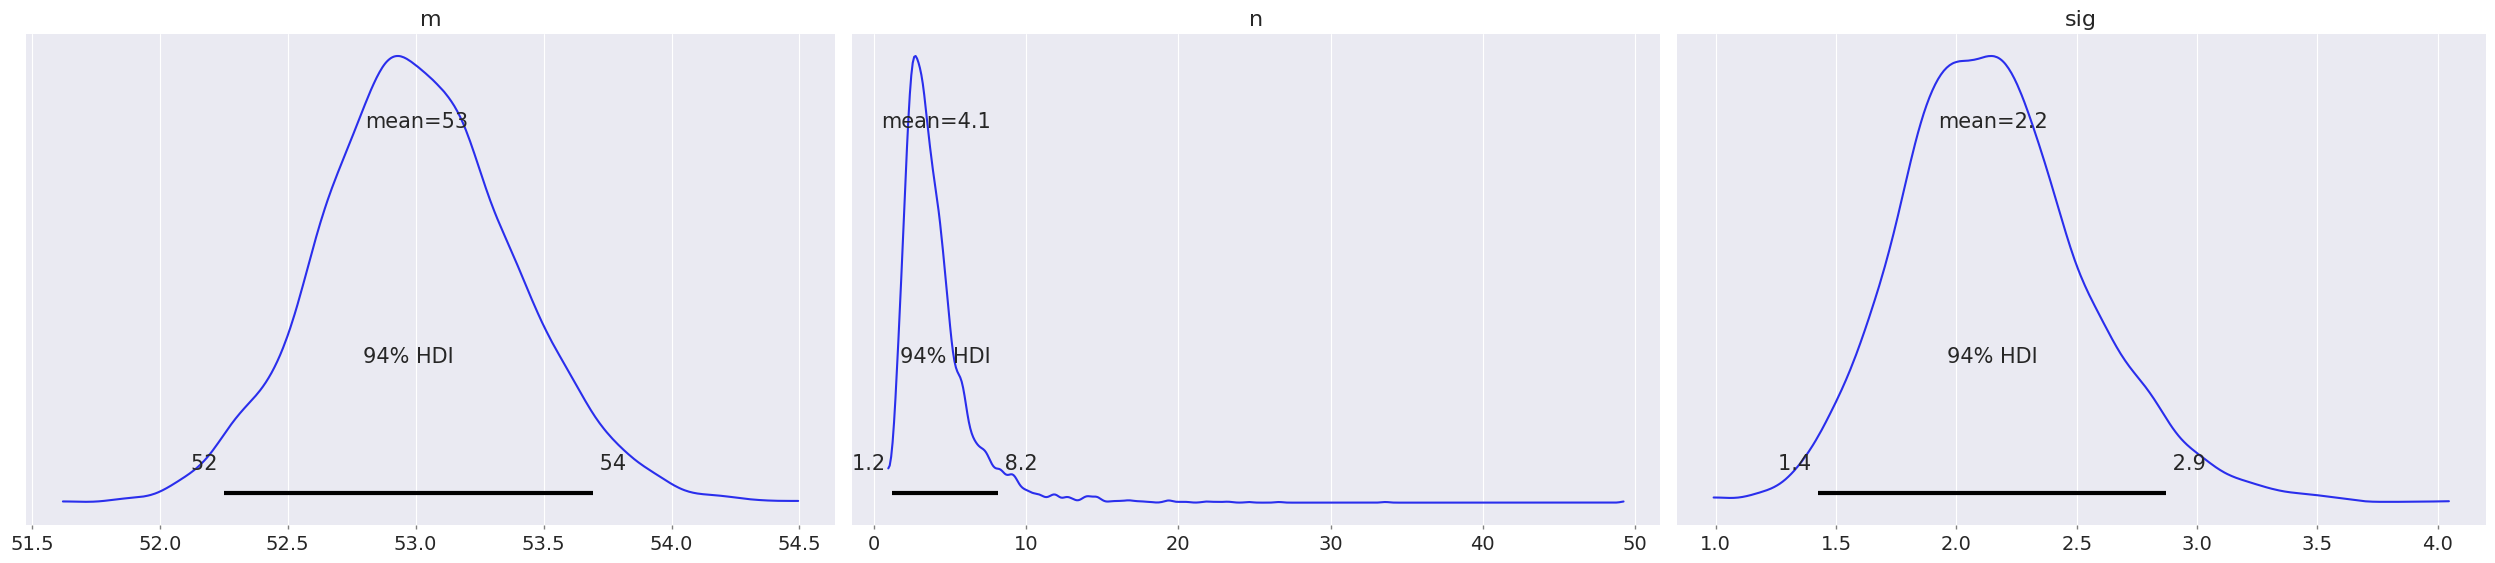

In [28]:
#plotting the posterior with the HDI
az.plot_posterior(idata_t)

Output()

<Axes: xlabel='Y'>

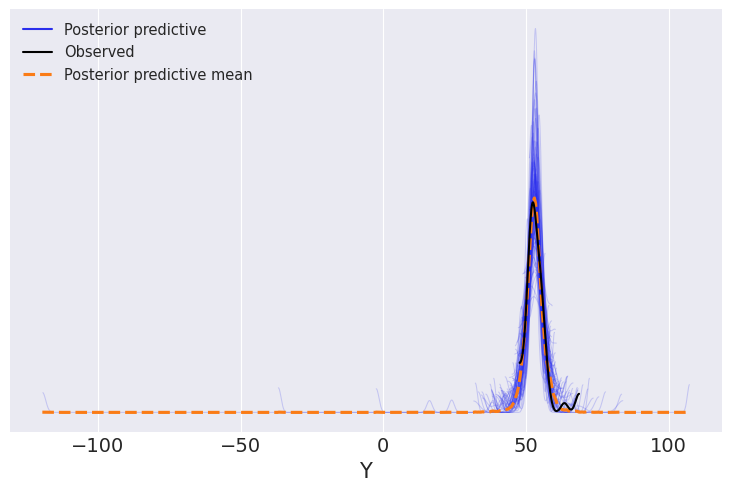

In [29]:
#Posterior predictive check
pm.sample_posterior_predictive(idata_t, model=model_t, extend_inferencedata=True)

az.plot_ppc(idata_t,  num_pp_samples=100)

## 4. Question 4

In [30]:
#a.
#mean and standard deviation with outliers

m_all = np.mean(data)
s_all = np.std(data, ddof = 1)

#computing IQR
#plt.boxplot(data, vert=False)

iqr = np.subtract(*np.percentile(data, [75, 25]))

data_no_outliers = data[(data >= np.percentile(data, 25) - 1.5 * iqr) & (data <= np.percentile(data, 75) + 1.5 * iqr)]

m_no_outliers = np.mean(data_no_outliers)
s_no_outliers = np.std(data_no_outliers, ddof = 1)


print(f'Removing outliers removed {len(data)-len(data_no_outliers)} data points')
print(f'The mean and standard devation of all the data is {round(m_all, 2), round(s_all, 2)}')
print(f'The mean and standard devation of the data without outliers is {round(m_no_outliers, 2), round(s_no_outliers, 2)}')

Removing outliers removed 2 data points
The mean and standard devation of all the data is (np.float64(53.5), np.float64(3.46))
The mean and standard devation of the data without outliers is (np.float64(52.95), np.float64(2.22))


{'whiskers': [<matplotlib.lines.Line2D at 0x7c49c654e8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c49c2dd7990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c49c654fcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c49c2dd5790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c49c2dd6050>],
 'means': []}

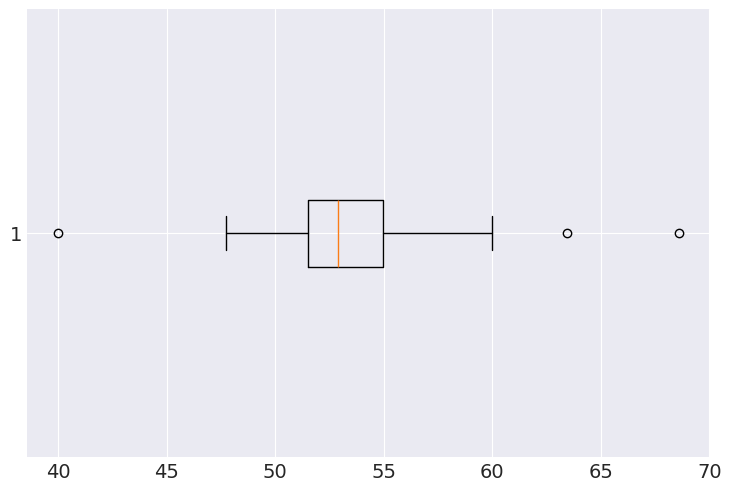

In [32]:
#c. adding more outliers
np.percentile(data, 25) - 1.5 * iqr
np.percentile(data, 25) + 1.5 * iqr

data_more_outliers = np.concatenate((data, np.array([40, 60])))

plt.boxplot(data_more_outliers, vert=False)

Output()

Output()

<Axes: xlabel='Y'>

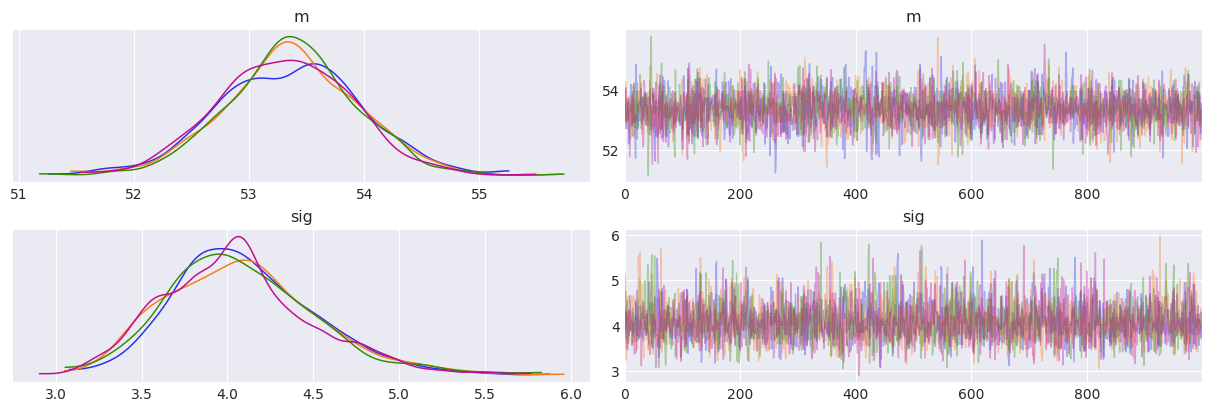

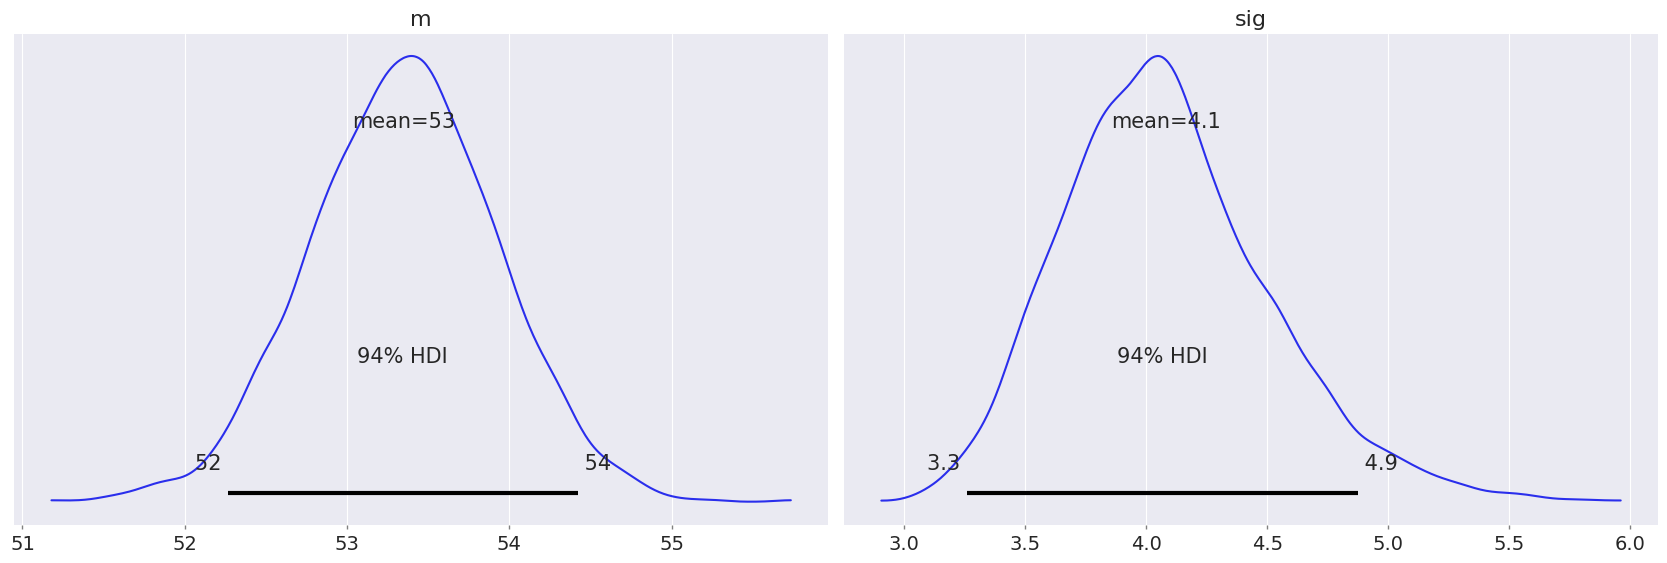

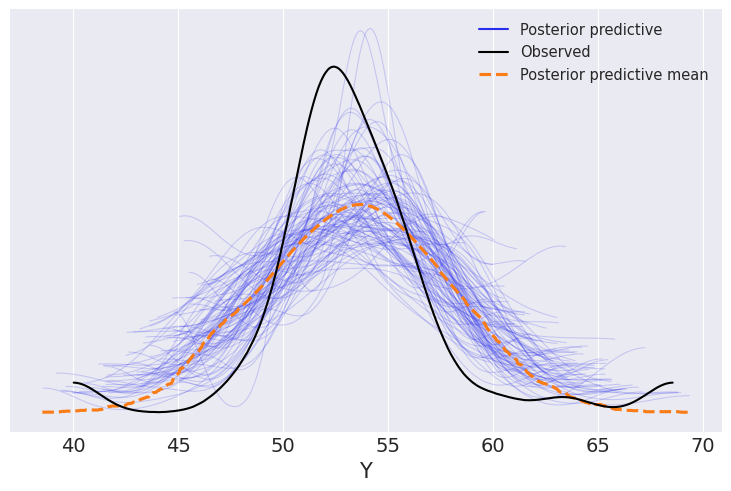

In [33]:
#normal model
with pm.Model() as model_2:
  m = pm.Normal('m', mu = mu_prior, sigma = sig_prior2)
  sig = pm.HalfNormal('sig', sigma = 5)
  Y = pm.Normal('Y', mu=m, sigma=sig, observed=data_more_outliers)
  idata_2 = pm.sample(1000, chains = 4)

az.plot_trace(idata_2, compact = False)
az.plot_posterior(idata_2)
pm.sample_posterior_predictive(idata_2, model=model_2, extend_inferencedata=True)
az.plot_ppc(idata_2, num_pp_samples=100)


Output()

Output()

<Axes: xlabel='Y'>

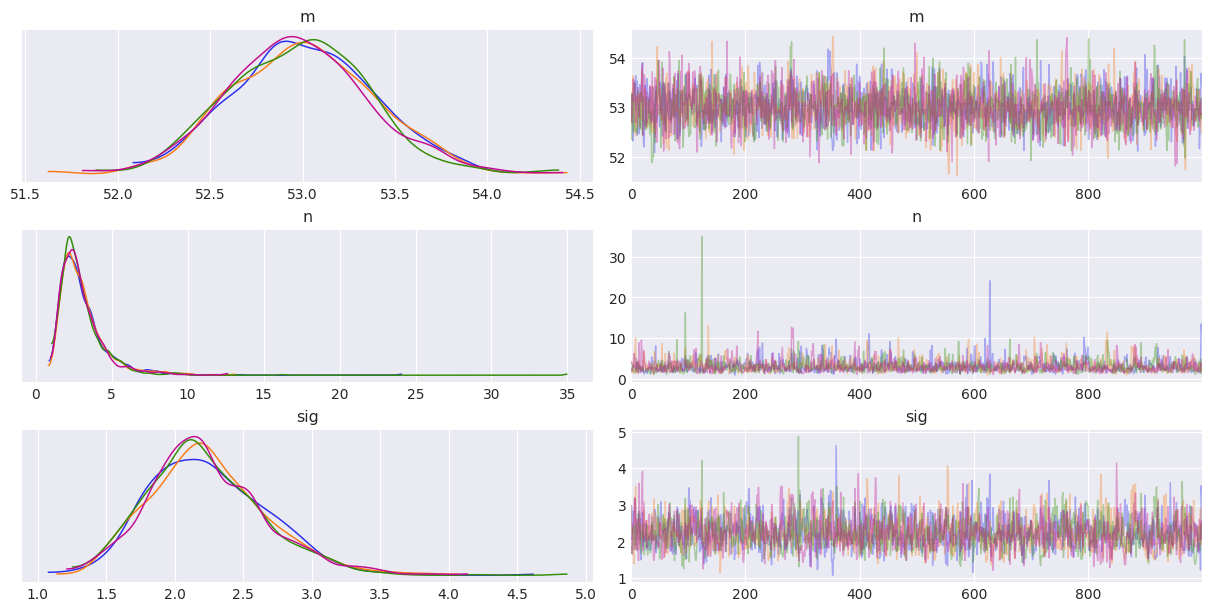

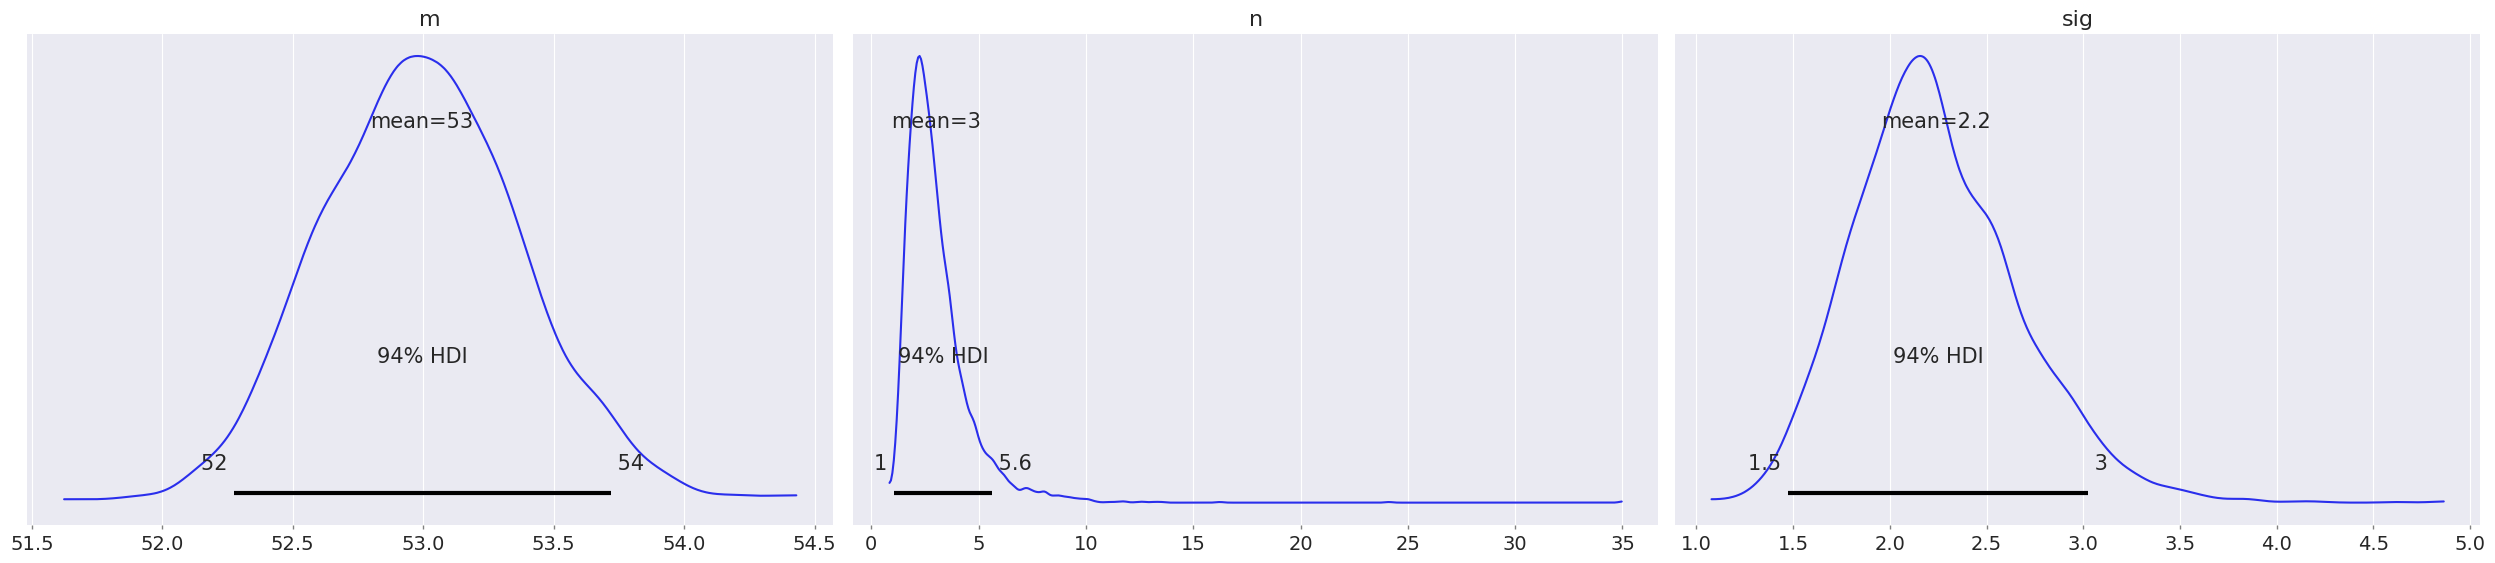

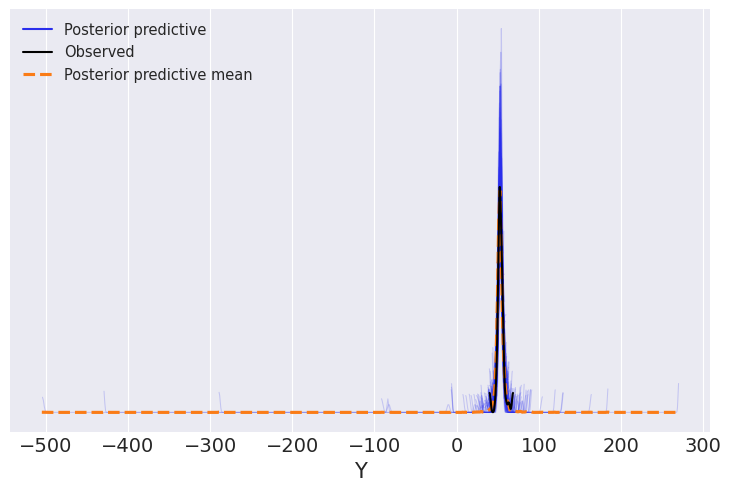

In [34]:
#t-model
with pm.Model() as model_t:
  m = pm.Normal('m', mu = mu_prior, sigma = sig_prior2)
  sig = pm.HalfNormal('sig', sigma = 5)
  n = pm.Exponential('n', 1/10)
  Y = pm.StudentT('Y', nu = n, mu=m, sigma=sig, observed=data_more_outliers)
  idata_t = pm.sample(1000, chains = 4)

az.plot_trace(idata_t, compact = False)
az.plot_posterior(idata_t)
pm.sample_posterior_predictive(idata_t, model=model_t, extend_inferencedata=True)
az.plot_ppc(idata_t,  num_pp_samples=100)

##5. Question 5

In [35]:
tips = pd.read_csv("https://github.com/aloctavodia/BAP3/raw/refs/heads/main/code/data//tips.csv")

In [36]:
categories = np.array(["Thur", "Fri", "Sat", "Sun"])
bill = tips["total_bill"].values
idx = pd.Categorical(tips["day"], categories=categories).codes

#creating the model
coords = {"days": categories, "days_flat":categories[idx]}

with pm.Model(coords=coords) as comparing_groups:
  m = pm.HalfNormal("m", sigma = 20, dims="days")
  sig = pm.HalfNormal("sig", sigma=30, dims="days")

  y = pm.Gamma("y", mu=m[idx], sigma=sig[idx], observed = bill, dims = "days_flat")

  idata_cg = pm.sample(1000, chains = 4)
  idata_cg.extend(pm.sample_posterior_predictive(idata_cg))

Output()

Output()

In [37]:
#looking at the inference data object
idata_cg

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

In [38]:
#b. 2. looking at the posterior for the mean on Sundays
mean_sun = idata_cg.sel(days="Sun") #all measurements in 2013
mean_sun

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<xarray.DataArray 'm' (sample: 4000)> Size: 32kB
array([-4.69006852, -1.26074418, -6.28449588, ..., -3.44690957,
       -3.44690957, -4.7645324 ])
Coordinates:
  * sample   (sample) object 32kB MultiIndex
  * chain    (sample) int64 32kB 0 0 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 3 3 3
  * draw     (sample) int64 32kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999

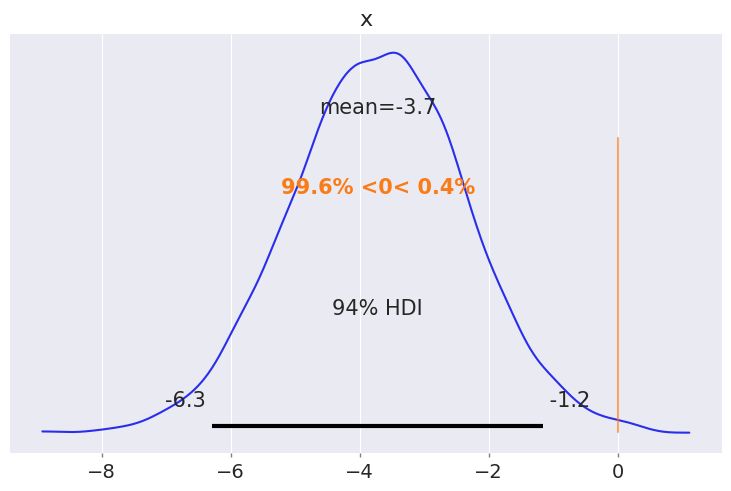

In [39]:
#b. 3. distributions of mean differences between Thursday and Sunday
cg_posterior = az.extract(idata_cg)
means_diff = cg_posterior["m"].sel(days='Thur') - cg_posterior['m'].sel(days='Sun')

az.plot_posterior(means_diff.values, ref_val=0)

means_diff

# Watermark

Please include this watermark so I can see what versions you are working with

In [ ]:
%%capture
!pip install watermark

In [ ]:
%load_ext watermark
%watermark -v -iv -w